# 1.Preprocessing

In [ ]:
# Load package
import pandas as pd
import re
import nltk
import numpy as np
import re
from bs4 import BeautifulSoup

In [ ]:
# Define preprocessing function
def clean_text(text):
    text = BeautifulSoup(text, "lxml").text  # Remove HTML tags
    text = re.sub(r'[\W]', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.lower().strip()

In [ ]:
# Loading data
df = pd.read_csv("https://raw.githubusercontent.com/hanth13/Text-Analytics-Group-7/main/Data/Amazon_phone_review_data.csv")

In [ ]:
# Applying preprocessing
df['review_text'] = df['review_text'].apply(clean_text)

<ipython-input-2-b45d36e35b3a>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text  # Remove HTML tags


In [ ]:
df

,brand,title,price,review_title,review_text,review_rating,review_date,overall_rating
0,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",Really happy,upgraded from an iphone 13 pro max normally ge...,5,9-Apr-24,4.5
1,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5
2,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","Quick,Great camera",wife loves it obviously,5,21-Apr-24,4.5
3,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",Nice design,the media could not be loaded maybe i shouldn ...,5,4-Mar-24,4.5
4,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",The screen freezes and I charge the battery ev...,i bought an iphone 15 pro max in december the ...,1,20-Jan-24,4.5
...,...,...,...,...,...,...,...,...
588,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Good good,the media could not be loaded hi guys been ord...,5,27-Apr-24,4.3
589,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,It's a good phone NEW,bought this phone refurbished never again too ...,5,21-Mar-24,4.3
590,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Great camera,my original p30 pro died after 2 years imea nu...,5,2-Oct-22,4.3
591,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Great value for money,great phone looked brand new everything works ...,5,26-Nov-23,4.3


# 2.Aspect-opinion extraction

## 2.1 Pre-trained model loading

We use the PyABSA package (Yang et al.,2023) to extract the aspects, corresponding opinions and polarity from each review.

This model is trained on the Laptop14 dataset (Pontiki et al., 2014), comprising reviews on laptop, a product with relatively similar aspects to our selected one, smartphones.

In [ ]:
!pip install pyabsa -U
from pyabsa import AspectSentimentTripletExtraction as ASTE
from pyabsa import ABSAInstruction

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

No CUDA GPU found in your device


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

[2024-05-11 10:21:04] (2.4.1.post1) PyABSA(2.4.1.post1): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


## 2.2 ABSA generator

Run the aspect_opinion_sentiment_category_extraction model from PyABSA

In [ ]:
# Run the model to get ABSA
if __name__ == "__main__":
   ## Initialize the ABSA generator
    generator = ABSAInstruction.ABSAGenerator("multilingual")

    ## Create an empty list to store the ABSA results
    absa_results = []

    ## Apply ABSA on each review text in the DataFrame column
    for review_text in df['review_text']:
        result = generator.predict(review_text)
        absa_results.append(result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[2024-05-11 10:21:19] (2.4.1.post1) ********** Available ACOS model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-05-11 10:21:19] (2.4.1.post1) ********** Available ACOS model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-05-11 10:21:19] (2.4.1.post1) Downloading checkpoint:multilingual 
[2024-05-11 10:21:19] (2.4.1.post1) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


Find zipped checkpoint: ./checkpoints/ACOS_MULTILINGUAL_CHECKPOINT/multilingual-acos.zip, unzipping


Done.
[2024-05-11 10:21:57] (2.4.1.post1) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/Multilingual/ACOS/multilingual-acos.zip 


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

{'text': 'upgraded from an iphone 13 pro max normally get a contract but thought i d just buy the phone off amazon and then get a 12 month contract works great and really good camera no faults at all taken a while to be delivered as i think the first one got stolen in an amazon depot', 'Quadruples': [{'aspect': 'phone', 'polarity': 'positive', 'opinion': 'great', 'category': 'LAPTOP#GENERAL'}, {'aspect': 'camera', 'polarity': 'positive', 'opinion': 'good', 'category': 'MULTIMEDIA_DEVICES#GENERAL'}]}
{'text': 'i n a huge apple fan with numerous apple devices in the house but a huge fan of android too google pixel 4xl still and recently a pixel fold my main driver will always be an iphone due to having the awu also but now that 15pm is on usb c it means if i need a cable to charge i ve a plethora of them no idea where my lightning cables are the device in its new titanium finish is superb i ve gone for blue and glad i did over black or natural the camera picture quality is superb and ove

Extract aspect, polarity and opinion and added as columns in the dataframe

In [ ]:
aspects = []
polarities = []
opinions = []
categories = []
indices = []

# Extract items from absa_results
for i, absa_result in enumerate(absa_results):
    for quadruple in absa_result['Quadruples']:
        aspects.append(quadruple['aspect'])
        polarities.append(quadruple['polarity'])
        opinions.append(quadruple['opinion'])
        categories.append(quadruple['category'])
        indices.append(i)  # Keep track of the original index to allow merging later

# Create a new DataFrame from the extracted items
new_df = pd.DataFrame({
    'aspect': aspects,
    'polarity': polarities,
    'opinion': opinions,
    'category': categories,
    'Index': indices
})

# Merge this new DataFrame back to the original DataFrame if needed
df_absa = df.merge(new_df, left_index=True, right_on='Index', how='left')

Cleaning the data in these 4 columns before fitting in further analysis by:

(1) Extracting the category words from the category column

In [ ]:
# Remove "LAPTOP" or "#" from each entry in the 'category' column using regex
df_absa['category'] = df_absa['category'].str.replace('^LAPTOP#', '', regex=True)  # Remove LAPTOP# at the beginning
df_absa['category'] = df_absa['category'].str.replace('#', '', regex=True)  # Remove any other #

(2) Lowering case the category column which is currently all capitalised

In [ ]:
# Lower case all the category
df_absa['category'] = df_absa['category'].str.lower()

Final check the test data before further analysis

In [ ]:
# Print the updated DataFrame
df_absa

,brand,title,price,review_title,review_text,review_rating,review_date,overall_rating,aspect,polarity,opinion,category,Index
0,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",Really happy,upgraded from an iphone 13 pro max normally ge...,5,9-Apr-24,4.5,phone,positive,great,general,0
1,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",Really happy,upgraded from an iphone 13 pro max normally ge...,5,9-Apr-24,4.5,camera,positive,good,multimedia_devicesgeneral,0
2,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,device,positive,superb,design_features,1
3,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,camera picture quality,positive,superb,displayquality,1
4,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,battery life,positive,excellent,batterygeneral,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Great value for money,great phone looked brand new everything works ...,5,26-Nov-23,4.3,camera,positive,love,displaygeneral,591
1296,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Great value for money,great phone looked brand new everything works ...,5,26-Nov-23,4.3,screen,positive,like,displaygeneral,591
1297,HUAWEI,"HUAWEI P40 Lite - Smartphone 128GB, 6GB RAM, D...",145,Nice,nice phone with great camera quality and good ...,5,4-Mar-24,3.6,phone,positive,nice,general,592
1298,HUAWEI,"HUAWEI P40 Lite - Smartphone 128GB, 6GB RAM, D...",145,Nice,nice phone with great camera quality and good ...,5,4-Mar-24,3.6,camera quality,positive,great,quality,592


# 3.Semantic search


We will use semantic search to match the 'category' column with the corresponding predefined aspect lists. The irrelevant categories will be defined as "Others" aspect and later removed from our Sentimental analysis.

We chose 'category' instead of 'aspect' because 'category' is more generalised, closer the predefined aspects we have selected

## 3.1 Sentence Embeddings
We created Sentence Embeddings with Sentence Transformer

In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

# Load the model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/sentence_transformers-2.7.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7e3829c6dea0>


## 3.2 Semantic Search Functionality

We use cosine similarity to compare between the category_embeddings and aspect_embeddings. The highest similarity for each row must exceed 0.5 to be assigned the corresponding defined aspects, otherwise, the category will be classified as "Others"

In [ ]:
defined_aspects = ['camera','battery','display','operation','storage','price','design']

from sklearn.metrics.pairwise import cosine_similarity

# Function to find the closest aspect for a given category
def find_closest_aspect(category, aspect, defined_aspects, threshold=0.5):
    category_embedding = sbert_model.encode([category])
    defined_aspect_embeddings = sbert_model.encode(defined_aspects)
    similarities_1 = cosine_similarity(category_embedding, defined_aspect_embeddings)[0]

    # Check if the highest similarity is greater than the threshold
    if 'camera' in aspect:
        closest_aspect = 'camera'
    else:
      if similarities_1.max() > threshold:
            closest_aspect_index = similarities_1.argmax()
            closest_aspect = defined_aspects[closest_aspect_index]
      else:
            closest_aspect = "Others"

    return closest_aspect

# Apply the function to each category-aspect pair in df_absa and save the result to a new column
df_absa['defined_aspect'] = df_absa.apply(lambda row: find_closest_aspect(row['category'], row['aspect'], defined_aspects), axis=1)

In [ ]:
df_absa

,brand,title,price,review_title,review_text,review_rating,review_date,overall_rating,aspect,polarity,opinion,category,Index,defined_aspect
0,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",Really happy,upgraded from an iphone 13 pro max normally ge...,5,9-Apr-24,4.5,phone,positive,great,general,0,Others
1,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",Really happy,upgraded from an iphone 13 pro max normally ge...,5,9-Apr-24,4.5,camera,positive,good,multimedia_devicesgeneral,0,camera
2,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,device,positive,superb,design_features,1,design
3,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,camera picture quality,positive,superb,displayquality,1,camera
4,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,battery life,positive,excellent,batterygeneral,1,battery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Great value for money,great phone looked brand new everything works ...,5,26-Nov-23,4.3,camera,positive,love,displaygeneral,591,camera
1296,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Great value for money,great phone looked brand new everything works ...,5,26-Nov-23,4.3,screen,positive,like,displaygeneral,591,display
1297,HUAWEI,"HUAWEI P40 Lite - Smartphone 128GB, 6GB RAM, D...",145,Nice,nice phone with great camera quality and good ...,5,4-Mar-24,3.6,phone,positive,nice,general,592,Others
1298,HUAWEI,"HUAWEI P40 Lite - Smartphone 128GB, 6GB RAM, D...",145,Nice,nice phone with great camera quality and good ...,5,4-Mar-24,3.6,camera quality,positive,great,quality,592,camera


## 3.3 Dataset cleaning before sentiment analysis
We remove 'Others' aspects and remove NULL 'opinion'

In [ ]:
# Filter out rows where the column 'defined_aspect' is 'Others'
clean_df = df_absa[df_absa['defined_aspect'] != 'Others']
# Filter out rows with NULL, 'None', or 'nan' values in the 'opinion' column
clean_df = clean_df[clean_df['opinion'].notnull() & (clean_df['opinion'] != 'None') &
                    (clean_df['opinion'].notna()) & (clean_df['opinion'] != '')]
clean_df = clean_df[clean_df['opinion'] != 'NULL']


In [ ]:
clean_df

,brand,title,price,review_title,review_text,review_rating,review_date,overall_rating,aspect,polarity,opinion,category,Index,defined_aspect
1,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",Really happy,upgraded from an iphone 13 pro max normally ge...,5,9-Apr-24,4.5,camera,positive,good,multimedia_devicesgeneral,0,camera
2,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,device,positive,superb,design_features,1,design
3,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,camera picture quality,positive,superb,displayquality,1,camera
4,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,battery life,positive,excellent,batterygeneral,1,battery
7,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",Nice design,the media could not be loaded maybe i shouldn ...,5,4-Mar-24,4.5,NULL,positive,impressed,design_features,3,design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,It's a good phone NEW,bought this phone refurbished never again too ...,5,21-Mar-24,4.3,touch screen,negative,terrible,displaygeneral,589,display
1295,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Great value for money,great phone looked brand new everything works ...,5,26-Nov-23,4.3,camera,positive,love,displaygeneral,591,camera
1296,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Great value for money,great phone looked brand new everything works ...,5,26-Nov-23,4.3,screen,positive,like,displaygeneral,591,display
1298,HUAWEI,"HUAWEI P40 Lite - Smartphone 128GB, 6GB RAM, D...",145,Nice,nice phone with great camera quality and good ...,5,4-Mar-24,3.6,camera quality,positive,great,quality,592,camera


# 4.Sentiment Analysis

## 4.1 Package loading & Function defining

In [ ]:
# AFINN Package
!pip install afinn
from afinn import Afinn
afinn = Afinn()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=5e17835181c3ff821340976ac4519348e4137e6a144eff7a5fa0b6301c3fa572
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:86: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/afinn-0.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<fr

In [ ]:
#TextBlob package
from textblob import TextBlob

In [ ]:
# Vader package
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Bert package
%pip install transformers
from transformers import pipeline
nlp = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

## 4.2 Performing sentiment analysis

In [ ]:
# Create empty lists to store sentiment analysis results
tb_sentiments = []
vader_compound_scores = []
bert_sentiments = []
bert_scores = []

# Iterate through each opinion in test_df['opinion'] to analyze sentiment
for opinion in clean_df['opinion']:
    # TextBlob sentiment
    blob = TextBlob(opinion)
    tb_sentiment = blob.sentiment[0]
    tb_sentiments.append(tb_sentiment)

    # VADER sentiment
    vader_sentiment = sid.polarity_scores(opinion)['compound']
    vader_compound_scores.append(vader_sentiment)

    # BERT sentiment (assuming 'nlp' is your BERT sentiment analysis model)
    bert_result = nlp(opinion)
    bert_sentiment = bert_result[0]['label']
    bert_score = bert_result[0]['score']
    bert_sentiments.append(bert_sentiment)
    bert_scores.append(bert_score)


# Add the sentiment analysis results as new columns in test_df
clean_df['TextBlob_Score'] = tb_sentiments
clean_df['VADER_Score'] = vader_compound_scores
clean_df['BERT_Sentiment'] = bert_sentiments
clean_df['BERT_Score'] = bert_scores

In [ ]:
clean_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,brand,title,price,review_title,review_text,review_rating,review_date,overall_rating,aspect,polarity,opinion,category,Index,defined_aspect,TextBlob_Score,VADER_Score,BERT_Sentiment,BERT_Score
1,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",Really happy,upgraded from an iphone 13 pro max normally ge...,5,9-Apr-24,4.5,camera,positive,good,multimedia_devicesgeneral,0,camera,0.7,0.4404,POSITIVE,0.999816
2,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,device,positive,superb,design_features,1,design,1.0,0.6249,POSITIVE,0.999866
3,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,camera picture quality,positive,superb,displayquality,1,camera,1.0,0.6249,POSITIVE,0.999866
4,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069","IMO, the best premium mobile phone by far...",i n a huge apple fan with numerous apple devic...,5,20-Feb-24,4.5,battery life,positive,excellent,batterygeneral,1,battery,1.0,0.5719,POSITIVE,0.999843
7,Apple,Apple iPhone 15 Pro Max (256 GB) - Black Titanium,"1,069",Nice design,the media could not be loaded maybe i shouldn ...,5,4-Mar-24,4.5,NULL,positive,impressed,design_features,3,design,1.0,0.4767,POSITIVE,0.999833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,It's a good phone NEW,bought this phone refurbished never again too ...,5,21-Mar-24,4.3,touch screen,negative,terrible,displaygeneral,589,display,-1.0,-0.4767,NEGATIVE,0.999753
1295,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Great value for money,great phone looked brand new everything works ...,5,26-Nov-23,4.3,camera,positive,love,displaygeneral,591,camera,0.5,0.6369,POSITIVE,0.999874
1296,HUAWEI,"Huawei P30 Pro - Smartphone 128GB, 6GB RAM, Du...",223,Great value for money,great phone looked brand new everything works ...,5,26-Nov-23,4.3,screen,positive,like,displaygeneral,591,display,0.0,0.3612,POSITIVE,0.991056
1298,HUAWEI,"HUAWEI P40 Lite - Smartphone 128GB, 6GB RAM, D...",145,Nice,nice phone with great camera quality and good ...,5,4-Mar-24,3.6,camera quality,positive,great,quality,592,camera,0.8,0.6249,POSITIVE,0.999863


# 5.Random Forest Prediction Model

## 5.1 Package loading

In [ ]:
# Import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

## 5.2 Preparing data for Random Forest

Transforming the defined aspects from rows to columns

In [ ]:
# Pivot the DataFrame to have separate columns for each aspect's sentiment score
df_pivoted = clean_df.pivot_table(index='review_text', columns='defined_aspect', values='VADER_Score', aggfunc='mean')


# Merge the pivoted DataFrame with the 'review_rating' column from the original DataFrame using 'review_text'
df_transformed = df_pivoted.merge(df[['review_text', 'review_rating']], on='review_text')


Replacing NA

In [ ]:
# Replace NA by 0
columns_to_fill = ['battery', 'camera', 'design', 'display', 'operation', 'price']
df_transformed[columns_to_fill] = df_transformed[columns_to_fill].fillna(0)


Classify customer satisfaction as "High" and "Low" based on review rating

In [ ]:
import numpy as np

# Define conditions for 'high' and 'low' ratings
conditions = [
    (df_transformed['review_rating'] >= 4),
    (df_transformed['review_rating'] < 4)
]

# Define corresponding values for each condition
values = ['high', 'low']

# Create the new column 'Type' based on the conditions
df_transformed['Type'] = np.where(conditions[0], values[0], np.where(conditions[1], values[1], np.nan))

In [ ]:
df_transformed

,review_text,battery,camera,design,display,operation,price,review_rating,Type
0,40 50 less than other sellers cheema new mobil...,0.0000,0.0000,0.00000,0.0,0.0000,0.6249,5,high
1,a nice light weight phone with a 6 7 in screen...,0.0000,0.0000,0.42150,0.0,0.0000,0.0000,5,high
2,a really good phone as someone who is hopeless...,0.0000,0.6249,0.00000,0.0,0.0000,0.0000,5,high
3,a trade up from my trusty iphone 6s which was ...,0.0000,0.0000,0.00000,0.0,0.0000,0.0000,4,high
4,a15 great phone has all i need great price fas...,0.0000,0.0000,0.00000,0.0,0.0000,0.6249,5,high
...,...,...,...,...,...,...,...,...,...
334,worked perfectly and as it should some slight ...,0.0000,0.0000,0.00000,0.0,0.6369,0.0000,4,high
335,works like brand new was in excellent conditio...,0.0000,0.0000,0.00000,0.0,0.5719,0.0000,5,high
336,yes the camera is better than my iphone 10 max...,0.4404,0.4404,0.00000,0.0,0.0000,0.0000,5,high
337,you can blur out as seen above or bring in foc...,0.0000,0.0000,0.00000,0.0,0.5719,0.0000,4,high


## 5.3 Random Forest Model & Evaluation

In [ ]:
from sklearn.metrics import classification_report

# Separate features (X) and target variable (y)
X = df_transformed[['camera', 'battery', 'display', 'operation', 'price', 'design']]
y = df_transformed['Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classification model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get classification report
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = rf_classifier.feature_importances_

# Combine with feature names for better interpretation
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort feature importance
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df_sorted)


Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

        high       0.95      0.98      0.97        62
         low       0.75      0.50      0.60         6

    accuracy                           0.94        68
   macro avg       0.85      0.74      0.78        68
weighted avg       0.94      0.94      0.94        68

     Feature  Importance
1    battery    0.397621
0     camera    0.163173
5     design    0.156806
3  operation    0.107069
2    display    0.098434
4      price    0.076896


Plotting feature importance

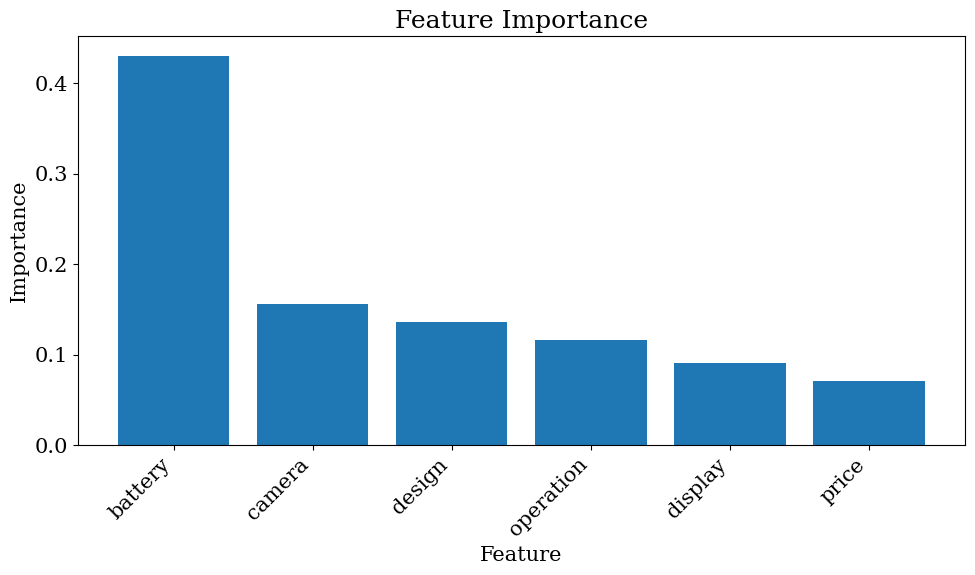

In [ ]:
import matplotlib.pyplot as plt

# Feature importance data
features = ['battery', 'camera', 'design', 'operation', 'display', 'price']
importance = [0.430223, 0.155616, 0.136298, 0.115672, 0.090771, 0.071419]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(features, importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 6.Competitive landscape analysis

Plotting frequency of aspects mentioned by brands

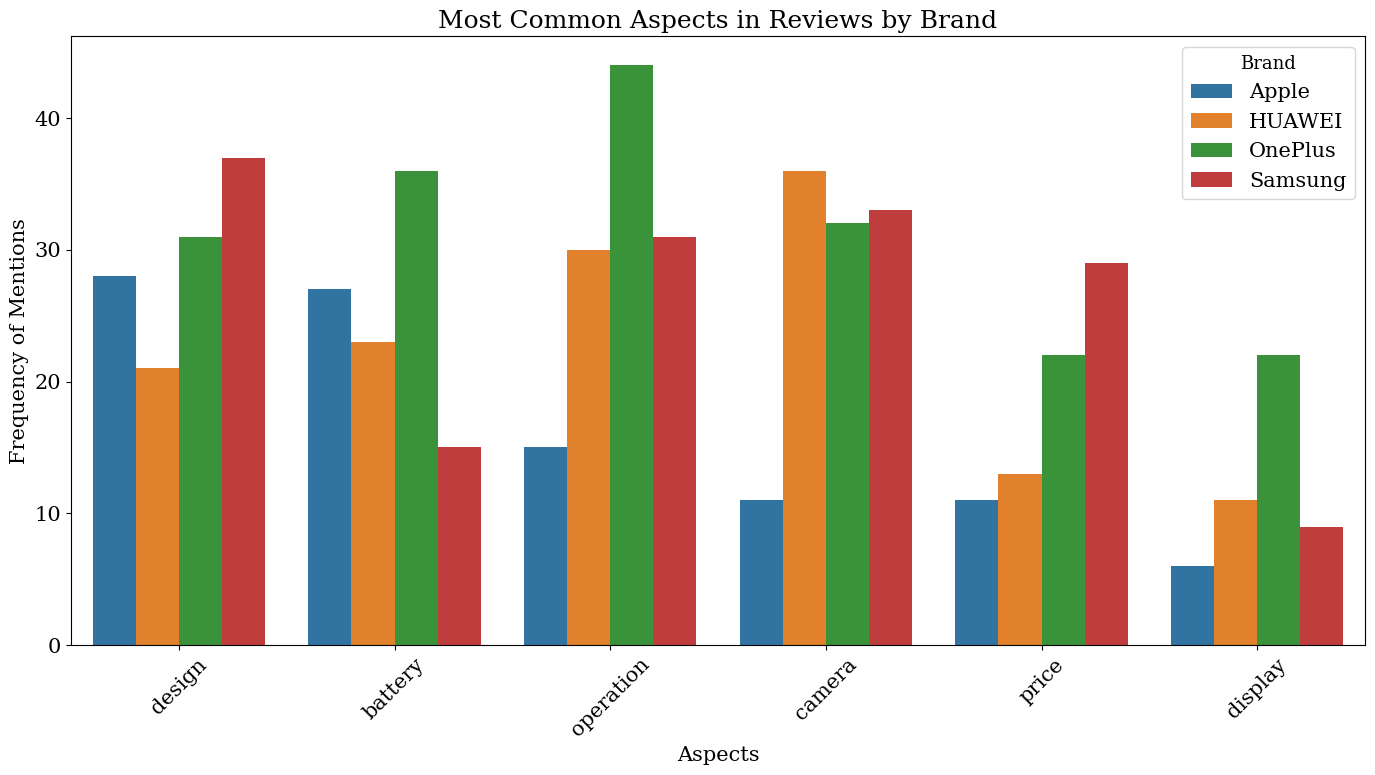

In [ ]:
aspect_counts = clean_df.groupby(['brand', 'defined_aspect']).size().reset_index(name='counts')

# Sort the data to show the most common aspects within each brand
aspect_counts = aspect_counts.sort_values(['brand', 'counts'], ascending=[True, False])

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(data=aspect_counts, x='defined_aspect', y='counts', hue='brand', dodge=True)

# Enhance the plot with labels and a title
plt.title('Most Common Aspects in Reviews by Brand')
plt.xlabel('Aspects')
plt.ylabel('Frequency of Mentions')
plt.xticks(rotation=45)  # Rotate the aspect names for better readability

# Adjust the legend to be more informative
plt.legend(title='Brand', title_fontsize='13', loc='upper right')

# Ensure everything fits without clipping
plt.tight_layout()

# Display the plot
plt.show()

Plotting sentiment scores between different brands across aspects

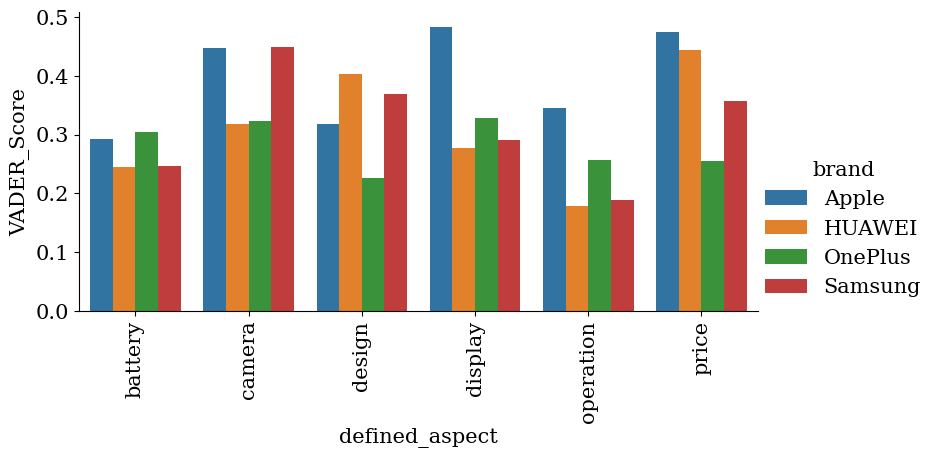

In [ ]:
# Compare sentiment scores between different brands across different aspects

aspect_sentiment = clean_df.groupby(['brand', 'defined_aspect'])['VADER_Score'].mean().reset_index()

sns.catplot(x='defined_aspect', y='VADER_Score', hue='brand', data=aspect_sentiment, kind='bar', height=4, aspect=2)
plt.xticks(rotation=90)
plt.show()